<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:150%; text-align:left">
<h3 align="center"><font color='#DEB887'>Laptop Price Prediction Model </font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

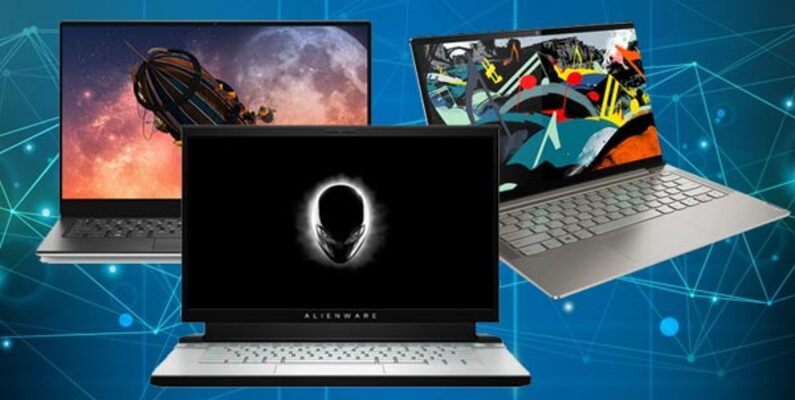

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          color:black;
          font-size:150%;
          text-align:center;">
Goal of  Model 
    <p style="padding: 9px;
              color:black;
              font-size:90%;
              text-align: center;">
     To Predict Price of the Laptop
   
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Work Flow:
</p>
</div>

- Step 1: Importing the required libraries
- Step 2: Loading the DataSet
- Step 3: Basic Understanding of Data
- Step 4: Data Preprocessing
- Step 5: Exploratory Data Analysis (EDA) along with Insights
- Step 6: Model Training , Building and Evaluation

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 1: Importing the Required Libraries
</p>
</div>

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.model_selection import cross_val_score


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 2: Loading the Data set
</p>
</div>

In [9]:
df=pd.read_csv("D:\\Desktop\\My Online Learning\\Machine Learning\\laptop_data.csv")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 3: Basic Understanding of Data
</p>
</div>

## Preview of data

In [12]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
892,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.17kg,90522.72
882,Asus,Notebook,14.1,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65kg,18541.44
655,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.0kg,56689.92


## How big is the data

In [14]:
df.shape

(1303, 11)

**Observation**:
- This Dataset has 1303 rows and 11 columns 

## Basic information of data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


## Fetching column names

In [19]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

####  Columns Description

- **Company**: Brand or manufacturer of the laptop.
- **TypeName**: Category of the laptop.
- **Inches**: Size of the laptop screen measured diagonally in inches.
- **ScreenResolution**: Clarity and sharpness of the display.
- **Cpu**: Type of processor in the laptop, which influences its performance.
- **Ram**: Amount of memory (RAM) in the laptop, measured in gigabytes (GB), which impacts multitasking.
- **Memory**: The storage capacity of the laptop, often measured in GB or TB.
- **Gpu**: Graphics Processing Unit, responsible for rendering graphics, important for gaming and design.
- **OpSys**: Operating system installed on the laptop.
- **Weight**: Weight of the laptop, indicating portability, measured in kilograms (kg).
- **Price**: The final cost of the laptop, which is your target variable (in Indian rupees).



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 4: Preprocessing 
</p>
</div>

## Detection of Missing values

In [23]:
df.isnull().sum().sum()

0

**Observation** : 

There is no Missing Values in the data

## Detection of Duplicate Values

In [26]:
df.duplicated().sum()

29

**Observation** : 

There is 29 Duplicated Values in the data, so we will remove it

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()  #Recheck the Duplicate values

0

## Checking the inconsistency or invalid value  in the columns

**First seggregating the data into object and numeric types and check the inconsitency accordingly**

In [32]:
df_obj=df.select_dtypes(include="object")
for i in df_obj:
    print(i,"------------",df[i].unique(),"has",df[i].nunique(),"values","\n\n")

Company ------------ ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG'] has 19 values 


TypeName ------------ ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation'] has 6 values 


ScreenResolution ------------ ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'


In [33]:
df_num=df.select_dtypes(exclude="object")
for i in df_num:
    print(i,"------------",df[i].unique(),"has",df[i].nunique(),"values","\n\n")

Inches ------------ [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3] has 18 values 


Price ------------ [ 71378.6832  47895.5232  30636.     135195.336   96095.808   21312.
 114017.6016  61735.536   79653.6     41025.6     20986.992   18381.0672
 130001.6016  26581.392   67260.672   80908.344   39693.6    152274.24
  26586.72    52161.12    10224.432   53226.72    13746.24    43636.32
  35111.52    22305.1392  58554.72    42624.      69157.44    47738.88
  13053.0672  10602.72    23389.92    99580.32    53173.44    13266.72
  19553.76    26037.4032  46833.12    20725.92    79866.72    27864.9072
  36336.96    75604.32    19660.32    69210.72    34045.92    24828.48
  16996.32    44808.48    21231.5472  58767.84    20459.52    40908.384
  31232.2032 130482.72    22111.2     31914.72    50136.48    36763.2
 105654.24    23373.4032  12201.12    29250.72    50562.72    58021.92
  50882.4     46353.6     58341.6     27652.32    45554.4     28238.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 5: Exploratory Data Analysis
</p>
</div>

### Feature Engineering

In [36]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


**Will Remove GB in Ram column and Kg in Weight & Change Data types for Better Analysis.** 

In [38]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [39]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [40]:
# Recheck Data types

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


# Univariate/Bivariate Analysis

<Axes: xlabel='Price', ylabel='Density'>

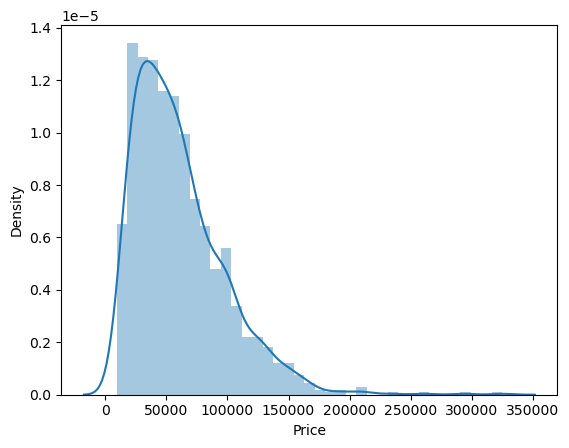

In [43]:
sns.distplot(df["Price"])

**Oberservation**

- It is Right Skew Data

- Most laptops price are lies in the range between 45,000 to 70,000 

- Few Laptops prices are expensive lies between 2,00,000 to 3,50,000

# No of Laptops Company Wise

<Axes: xlabel='Company', ylabel='count'>

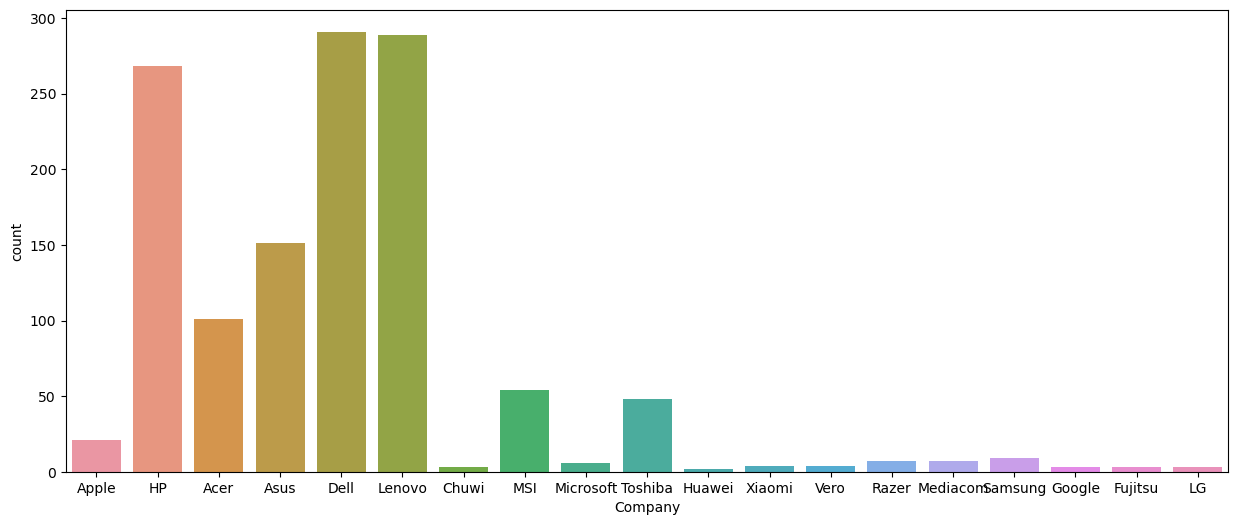

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(x="Company",data=df)

**Observations**

- Most purchasing Laptop is of Dell, Lenovo & HP.

# Price of Laptops of Particular Company Wise

<Axes: xlabel='Company', ylabel='Price'>

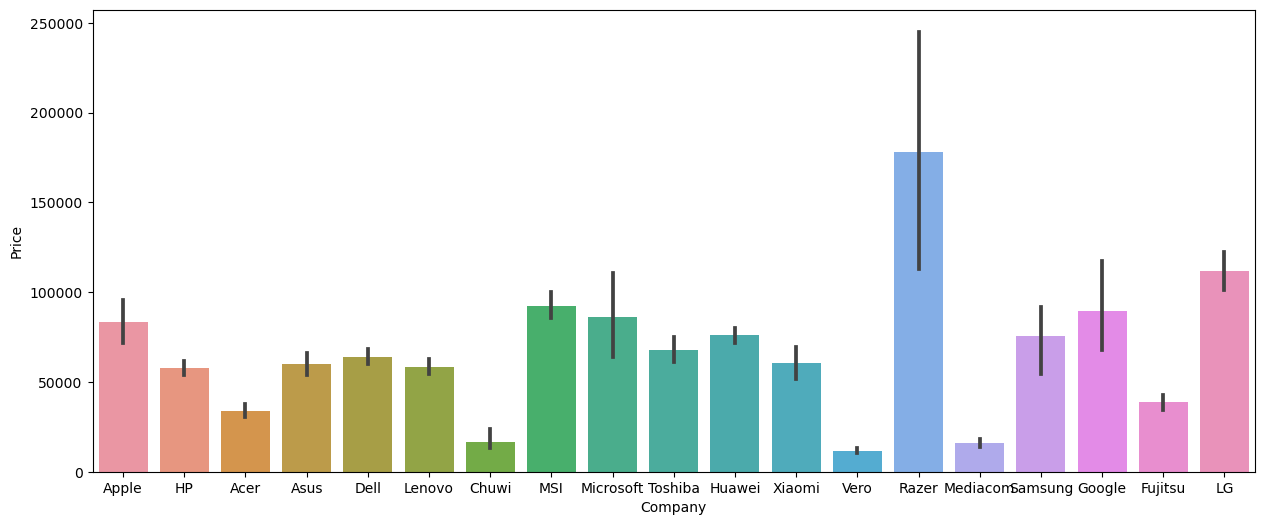

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["Company"],y=df["Price"])


**Observations**

- Price Varies Company to Company name
- Razer has highest price of amoung all laptops
- Vero, Chuwi has Lowest price of amoung all the laptops.

In [51]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


# Different Laptop TypeName

<Axes: xlabel='TypeName', ylabel='count'>

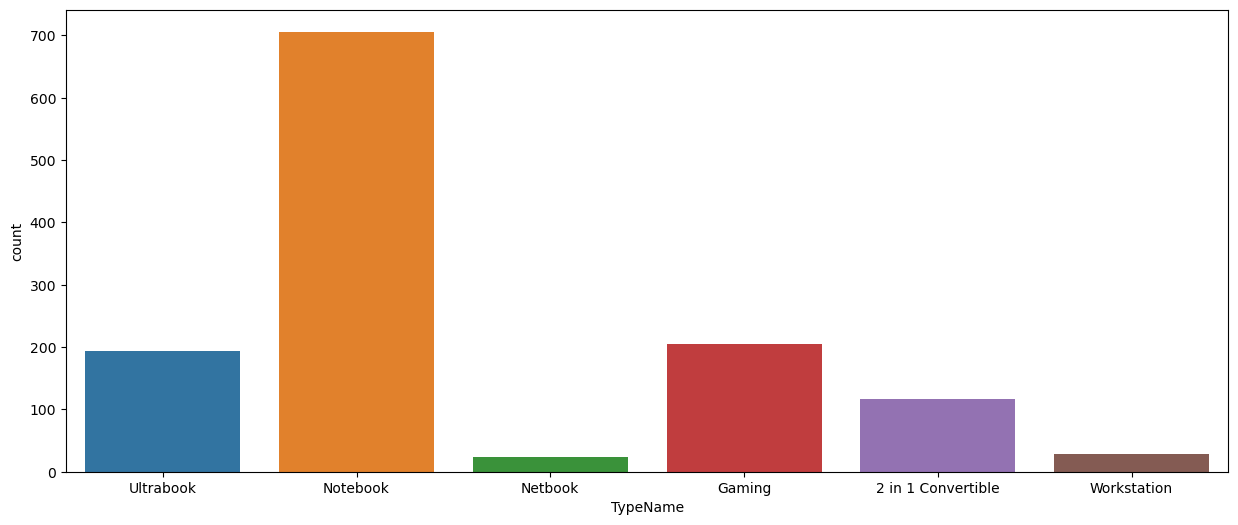

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x="TypeName",data=df)

**Observation**

- Mostly use Laptop type is Notebook
- Least use Laptop type is Netbook & Workstation

# Price of Laptops with particular Type

<Axes: xlabel='TypeName', ylabel='Price'>

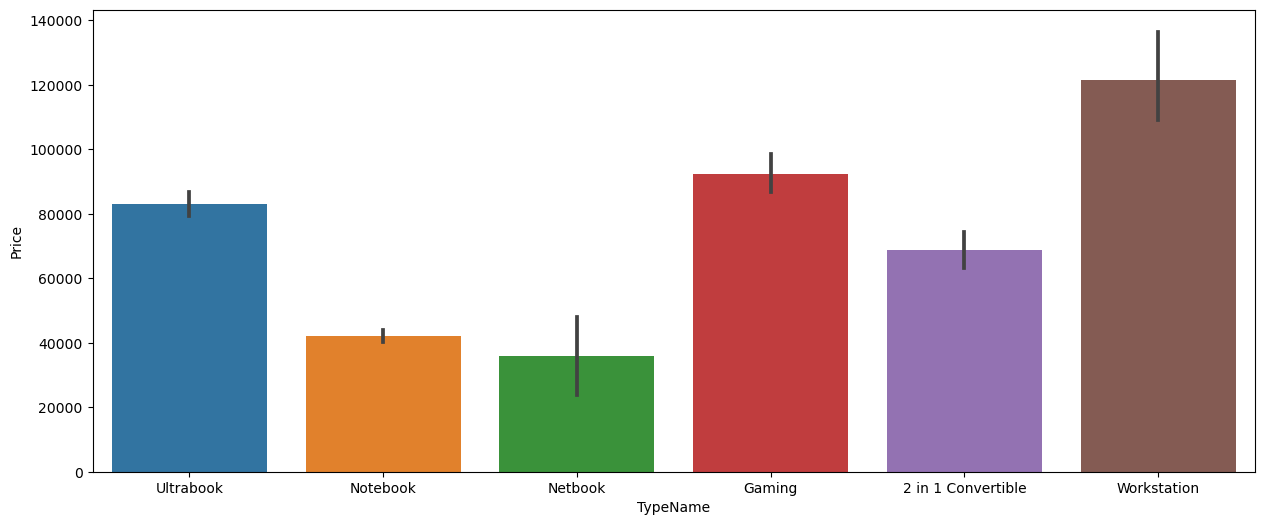

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["TypeName"],y=df["Price"])

**Observations**

- Price Varies with LaptopType 
- Wokstation Type is highest price of amoung all laptops
- Netbook Type is Lowest price of amoung all the laptops.

# Most Common Size laptops 

<Axes: xlabel='Inches', ylabel='Density'>

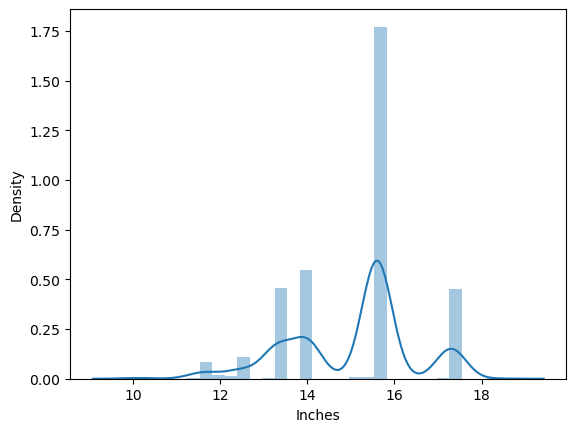

In [59]:
sns.distplot(df["Inches"])

**Observations**

- Most Common size usable Laptop is around 15.6 inches, 13.to 14 inches and then 17 inches are less usable
- Moderate Common size usable Laptop is around 13 to 14 inches
- Least Common size usable Laptop is around 17 inches & 12.5 inches.

<Axes: xlabel='Inches', ylabel='Price'>

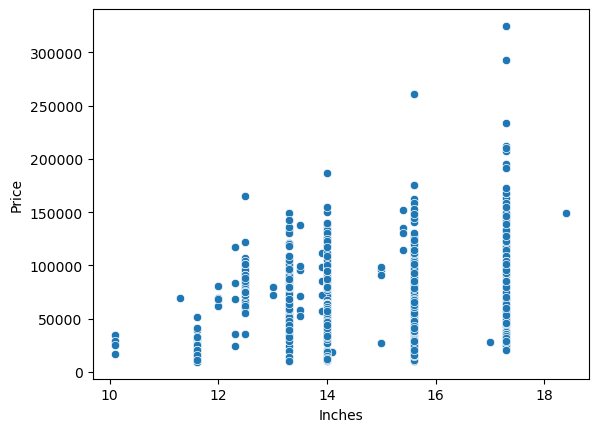

In [61]:
sns.scatterplot(x=df["Inches"],y=df["Price"])

**Observations**

- Price is directly proportional to the Size (Inches), Price increases Inches increases.
- Not Strongly postive relation but positive relation

In [63]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [64]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [65]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
95,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.50,45128.1600,1
391,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3.00,84768.4800,0
1149,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.27,124621.9200,1
317,Lenovo,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,24503.4720,0
513,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,64961.1072,0


<Axes: xlabel='Touchscreen', ylabel='count'>

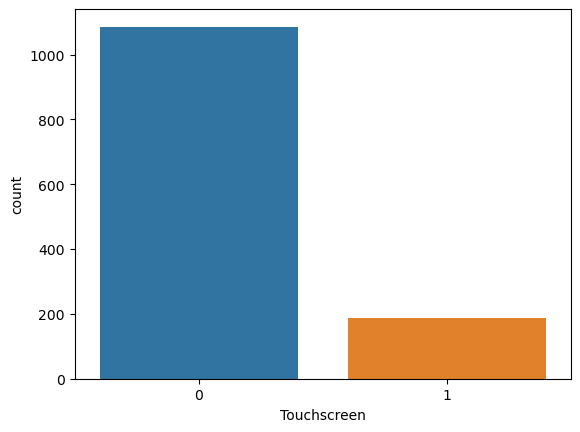

In [66]:
sns.countplot(x="Touchscreen",data=df)

<Axes: xlabel='Touchscreen', ylabel='Price'>

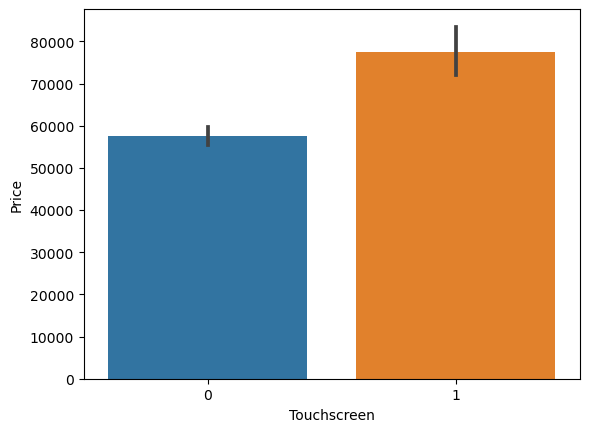

In [67]:
sns.barplot(x=df["Touchscreen"],y=df["Price"],data=df)

**Observation**
- Touchscreen Laptops are higher in price 

In [69]:
df["IPS"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)  
#1 for Yes
#0 for No

In [70]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


<Axes: xlabel='IPS', ylabel='count'>

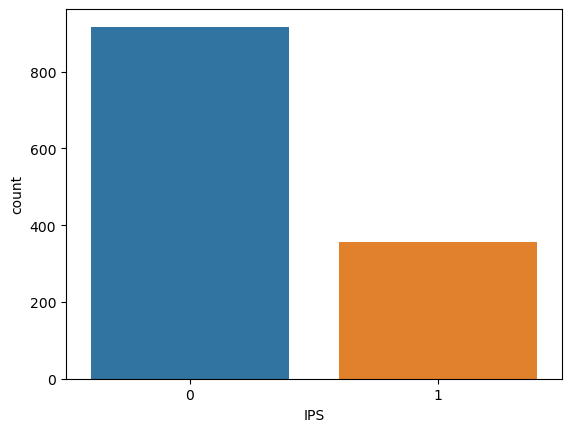

In [71]:
sns.countplot(x="IPS",data=df)

<Axes: xlabel='IPS', ylabel='Price'>

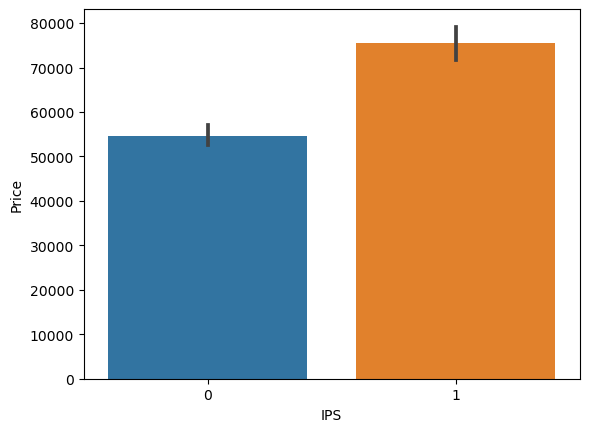

In [72]:
sns.barplot(x=df["IPS"],y=df["Price"],data=df)

**Observation**
- IPS Laptops are higher in price than Non IPS Laptops 

## Introduce new column PPI(Pixels Per Inch)

In [75]:
new=df["ScreenResolution"].str.split("x",n=1,expand=True)

In [76]:
df["x_res"]=new[0]
df["y_res"]=new[1]

In [77]:
df["x_res"]=df["x_res"].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df["x_res"]=df["x_res"].astype(int)
df["y_res"]=df["y_res"].astype(int)

In [78]:
df["PPI"]=(((df["x_res"]**2) + (df["y_res"]**2))**0.5/df["Inches"]).astype("float")


In [79]:
df.drop(columns=["ScreenResolution","Inches","x_res","y_res"],inplace=True)

In [80]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


In [81]:
df["Cpu Name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[0:3])) #doudt means use of join

In [82]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [83]:
def fetch_processor(text):
    if text == "Intel Core i7"  or text == "Intel Core i5" or text== "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [84]:
df["Cpu brand"]=df["Cpu Name"].apply(fetch_processor)

In [85]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand', ylabel='count'>

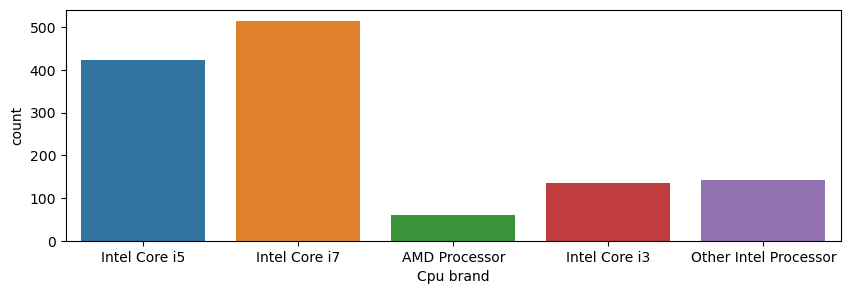

In [86]:
plt.figure(figsize=(10,3))
sns.countplot(x="Cpu brand",data=df)

<Axes: xlabel='Cpu brand', ylabel='Price'>

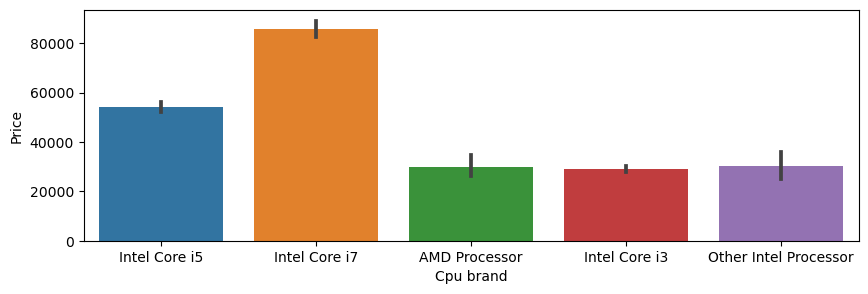

In [87]:
plt.figure(figsize=(10,3))
sns.barplot(x=df["Cpu brand"],y=df["Price"],data=df)

**Observations**

- Intel Core i7 is the highest price and followed by the Intel Core i5 and rest are almost same at price.
- Intel Core i7 starting price is above 80,000 Rs
- Intel Core i5 starting price is above 55,000 Rs
- Intel Core i3/AMD Processor/Other Intel Processor starting price is above 28,000 Rs

In [89]:
df.drop(columns=["Cpu","Cpu Name"],inplace=True)

In [90]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


<Axes: xlabel='Ram', ylabel='count'>

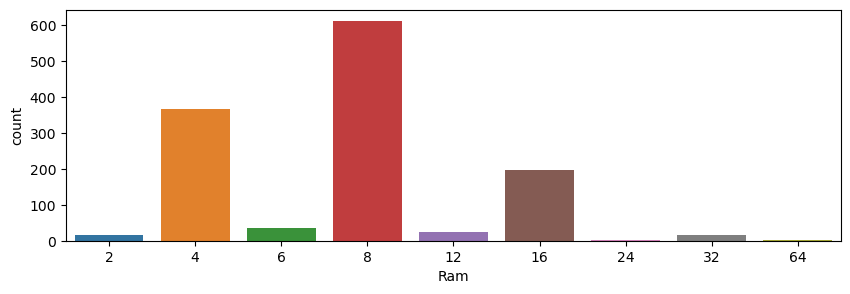

In [91]:
plt.figure(figsize=(10,3))
sns.countplot(x="Ram",data=df)

<Axes: xlabel='Ram', ylabel='Price'>

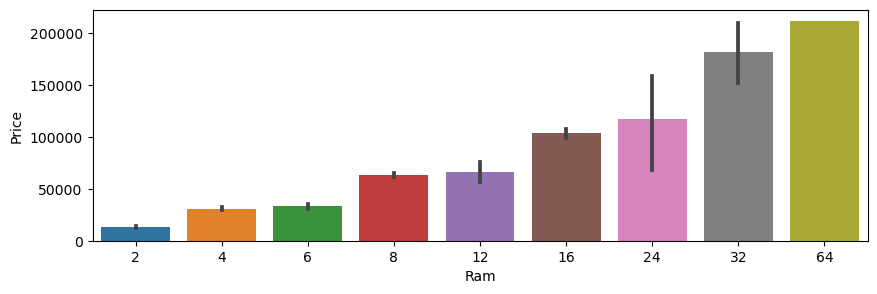

In [92]:
plt.figure(figsize=(10,3))
sns.barplot(x=df["Ram"],y=df["Price"],data=df)

**Observations**
- Most common usable Ram is 8GB now a days it is standard size.
- Ram is Strongly positive Linear relation with Price

In [94]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [95]:
# Clean and split the 'Memory' column
df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '', regex=True).str.replace('GB', '').str.replace('TB', '000')
new = df["Memory"].str.split("+", n=1, expand=True)

# Strip spaces and keep only numeric characters, replace NaNs with '0'
df["first"] = new[0].fillna("0").str.strip().str.extract('(\d+)').fillna(0).astype(int)
df["second"] = new[1].fillna("0").str.extract('(\d+)').fillna(0).astype(int)

# Define storage type flags, ensure there are no None/NaN values
df["Layer1HDD"] = new[0].fillna('').apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = new[0].fillna('').apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = new[0].fillna('').apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = new[0].fillna('').apply(lambda x: 1 if "Flash Storage" in x else 0)

df["Layer2HDD"] = new[1].fillna('').apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = new[1].fillna('').apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = new[1].fillna('').apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = new[1].fillna('').apply(lambda x: 1 if "Flash Storage" in x else 0)

# Calculate total storage for each type
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

# Drop unnecessary columns
df.drop(columns=['Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage','first','second'], inplace=True)


In [96]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [97]:
df.drop(columns="Memory",inplace=True)

In [98]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [99]:
df_num=df.select_dtypes(exclude="object")
df_num

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,128
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...
1269,4,2.20,38378.6496,0,0,100.454670,500,0,0,0
1270,4,1.80,33992.6400,1,1,157.350512,0,128,0,0
1271,16,1.30,79866.7200,1,1,276.053530,0,512,0,0
1272,2,1.50,12201.1200,0,0,111.935204,0,0,0,64


In [100]:
df_num.corr()["Price"]

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

**Observation**

- Strong relation between Price and SSD so SSD Size Increases Price increases.
- Weak Negative relation between Price and HDD.
- Very Weak Relation between Price & Hybrid and Flash_Storage so we will remove it.

In [102]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [103]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


In [104]:
df["Gpu brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [105]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [106]:
df["Gpu brand"].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [107]:
df=df[df["Gpu brand"]!="ARM"]
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,Intel Core i7,500,0,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1271,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1272,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel


<Axes: xlabel='Gpu brand', ylabel='count'>

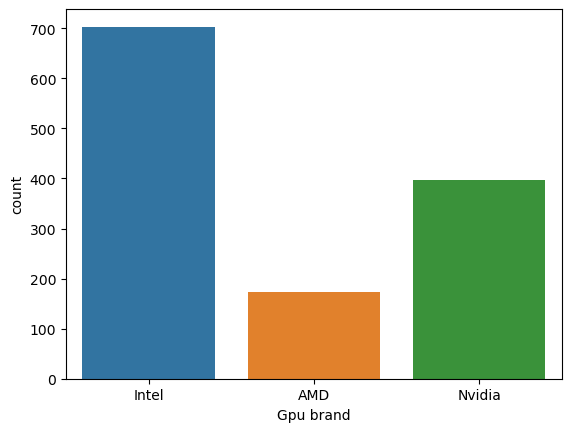

In [108]:
sns.countplot(x="Gpu brand",data=df)

**Observations**

- Most Using Graphics brand is Intel
- Least Using Graphics brand is AMD

<Axes: xlabel='Gpu brand', ylabel='Price'>

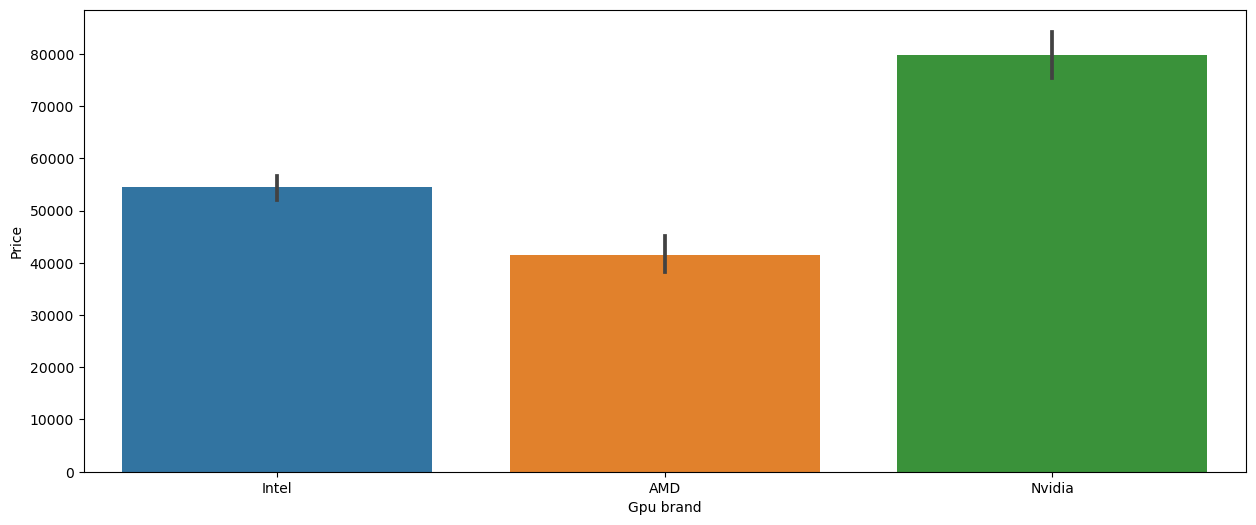

In [110]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["Gpu brand"],y=df["Price"])


**Observations**
- Price Varies with Gpu brand
- Most Expensive Graphics brand is Nvidia and followed by Intel.
- Lowest Price Graphics brand is AMD

In [112]:
df.drop(columns="Gpu",inplace=True)

In [113]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


<Axes: xlabel='OpSys', ylabel='count'>

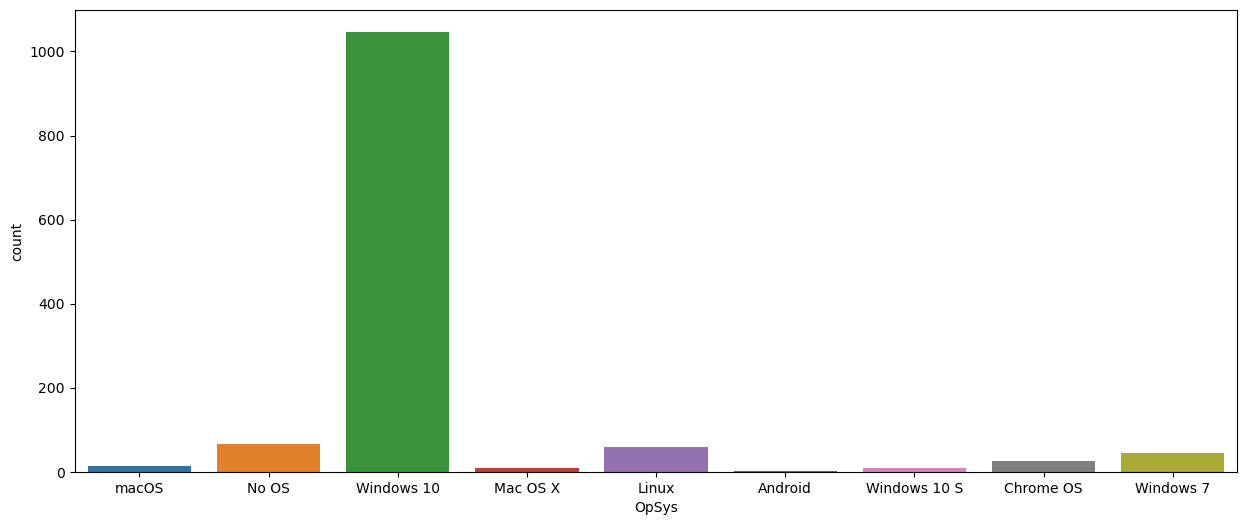

In [114]:
plt.figure(figsize=(15,6))
sns.countplot(x="OpSys",data=df)

<Axes: xlabel='OpSys', ylabel='Price'>

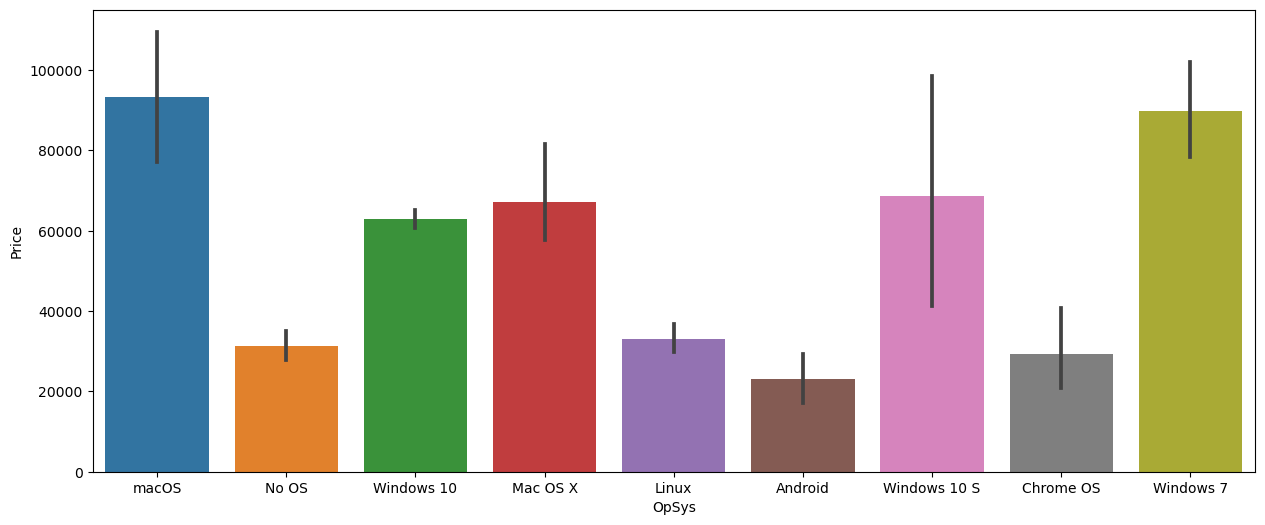

In [115]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["OpSys"],y=df["Price"])

**Observations**

- Highest price Operating System is MacOS & Windows 7
- Moderate price Operating system is Windows 10 s & Windows 10
- Lowest price Operating system is Linux, No OS, Chrome OS, Android



In [117]:
def cat_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "Mac"
    else:
        return "Other/No OS/Linux"

In [118]:
df["OS"]= df["OpSys"].apply(cat_os)

In [119]:
df.drop(columns="OpSys",inplace=True)

In [120]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

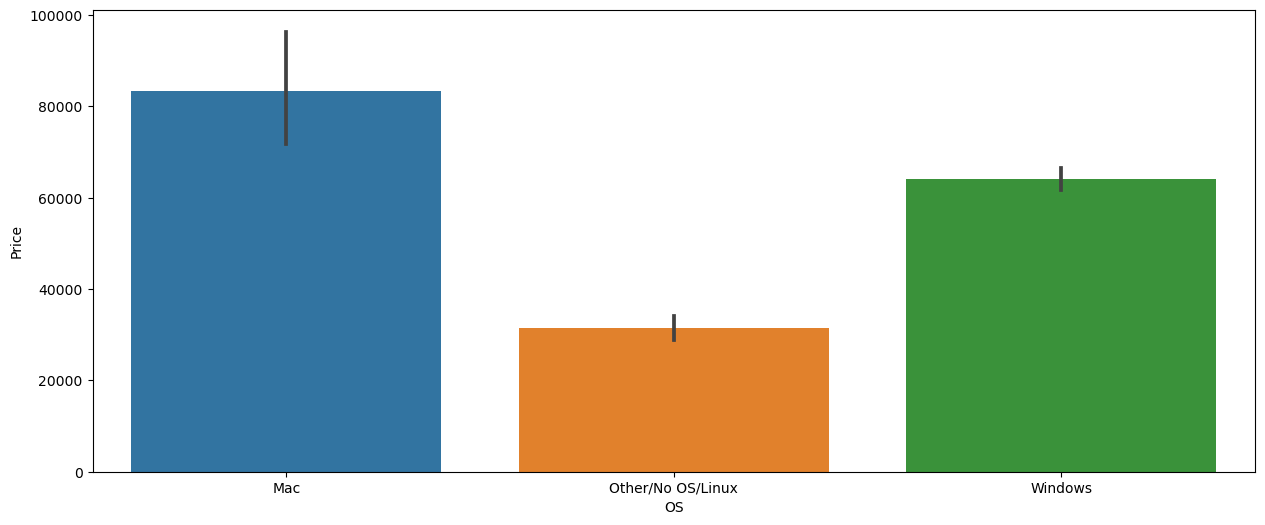

In [121]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["OS"],y=df["Price"])

<Axes: xlabel='Weight', ylabel='Density'>

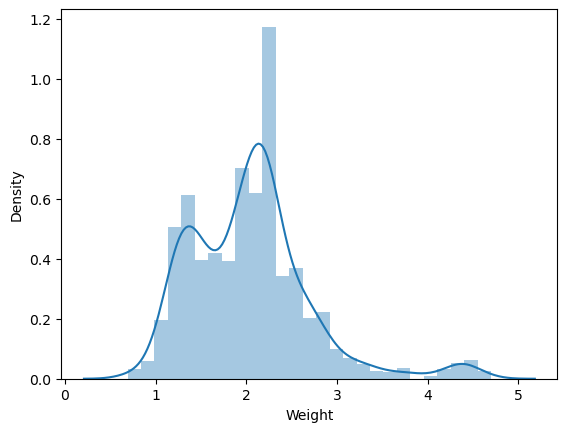

In [122]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

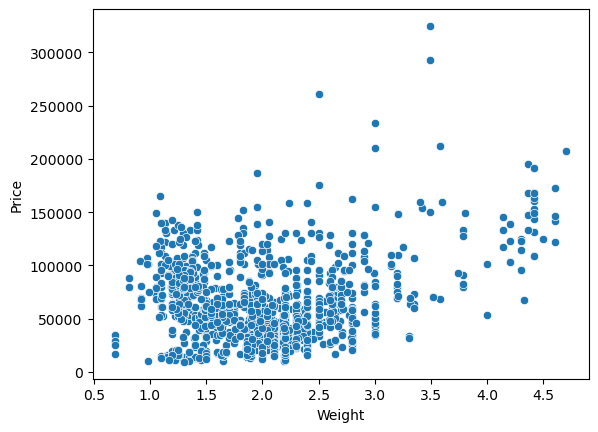

In [123]:
sns.scatterplot(x=df["Weight"],y=df["Price"])



**Observation**
- Mostly purchase latptop of weight are 2 to 2.2 kg
- Weak relation between Price and Weight

In [125]:
df_n=df.select_dtypes(exclude="object")
df_n.corr()["Price"]

Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
IPS            0.251514
PPI            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

<Axes: >

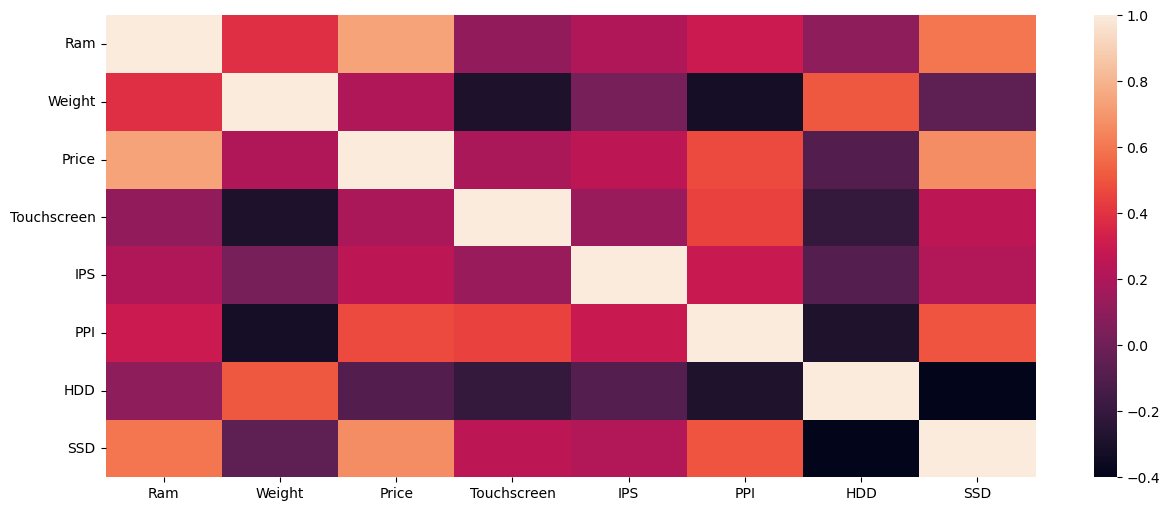

In [126]:
plt.figure(figsize=(15,6))
sns.heatmap(df_n.corr())

In [127]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux


### As we know our Target variable is Right skew so we will reduce skew data. 

<Axes: xlabel='Price', ylabel='Density'>

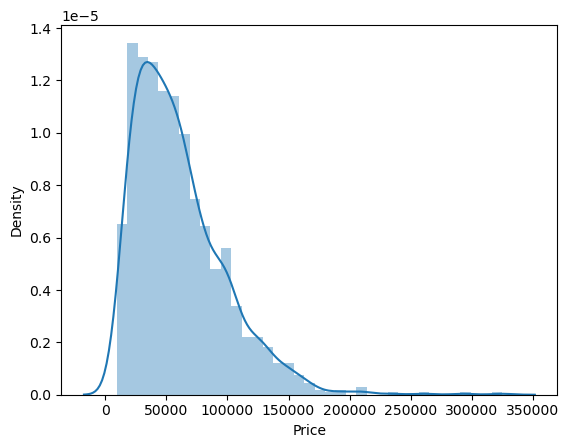

In [129]:
sns.distplot(df["Price"])

<Axes: xlabel='Price', ylabel='Density'>

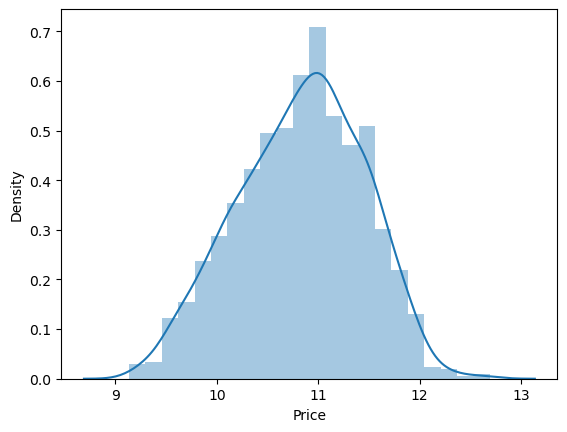

In [130]:
sns.distplot(np.log(df["Price"]))

**Observations**

Now It's is Normal distribution curve. It's better for Training and building a Model 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:180%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 6: Model Training,Building & Evaluation
</p>
</div>

## Segregating of Features (x) and Target (y)

In [215]:
x=df.drop(columns="Price")
y=np.log(df["Price"])

In [217]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [219]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

## Dividing the data into train and test

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

# Training, Building, Evaulation of Model by Using different Algorithms

### Training, Building, Evaulation of Model by Using LinearRegression

In [227]:
# Step 1: Prepare the pipeline with OneHotEncoding and Feature Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # pass through other columns unchanged
)

# Step 2: Create a Pipeline with Scaling and Model
pipe = Pipeline([
    ('step1', step1),                # Column transformation (OneHotEncoding and Scaling)
    ('step2', LinearRegression())     # Linear Regression model
])

# Step 3: Fit the model on training data
pipe.fit(x_train, y_train)

# Step 4: Predict on the training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 5: Evaluate the model
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 6: Apply Cross-Validation on the entire pipeline
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 7: Print Cross-Validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 83.43082582186884
R2 score at test: 79.54677578721177
MAE: 0.2090724449917402
Cross-Validation R2 Scores: [0.83702203 0.8037157  0.819709   0.82174755 0.80966891]
Mean R2 from Cross-Validation: 0.8183726377937368


### Training, Building, Evaulation of Model by Using Ridge Regression

In [229]:
# Step 1: Prepare the pipeline with OneHotEncoding and Feature Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Create a Pipeline with Column transformation, Scaling, and Ridge Regression
pipe = Pipeline([
    ('step1', step1),                # Column transformation (OneHotEncoding + Scaling)
    ('step2', Ridge(alpha=10))        # Ridge Regression model with alpha=10
])

# Step 3: Fit the model on training data
pipe.fit(x_train, y_train)

# Step 4: Predict on the training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 5: Evaluate the model
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 6: Apply Cross-Validation on the entire pipeline
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 7: Print Cross-Validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())



R2 score at training: 82.23884414633564
R2 score at test: 80.79436014873045
MAE: 0.20437897566705993
Cross-Validation R2 Scores: [0.8204689  0.79238996 0.82332725 0.80772125 0.79860018]
Mean R2 from Cross-Validation: 0.8085015070288162


### Training, Building, Evaulation of Model by Using Lasso Regression

In [231]:
# Step 1: Prepare the pipeline with OneHotEncoding and Feature Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Create a Pipeline with Column transformation, Scaling, and Lasso Regression
pipe = Pipeline([
    ('step1', step1),                # Column transformation (OneHotEncoding + Scaling)
    ('step2', Lasso(alpha=0.001))    # Lasso Regression model with alpha=0.001
])

# Step 3: Fit the model on training data
pipe.fit(x_train, y_train)

# Step 4: Predict on the training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 5: Evaluate the model
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 6: Apply Cross-Validation on the entire pipeline
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 7: Print Cross-Validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 82.46106239624508
R2 score at test: 80.29751648978282
MAE: 0.20696353629697217
Cross-Validation R2 Scores: [0.82310908 0.79345862 0.82214037 0.81244606 0.79908926]
Mean R2 from Cross-Validation: 0.8100486800911794


### Training, Building, Evaulation of Model by Using KNearestNeighbour (KNN)

In [235]:
# Step 1: Prepare the pipeline with OneHotEncoding and Feature Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Create a Pipeline with Column transformation, Scaling, and KNeighborsRegressor
pipe = Pipeline([
    ('step1', step1),                         # Column transformation (OneHotEncoding + Scaling)
    ('step2', KNeighborsRegressor(n_neighbors=5))  # KNeighborsRegressor with 5 neighbors
])

# Step 3: Fit the model on training data
pipe.fit(x_train, y_train)

# Step 4: Predict on the training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 5: Evaluate the model
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 6: Apply Cross-Validation on the entire pipeline
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 7: Print Cross-Validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 89.67538225461668
R2 score at test: 83.75320370940244
MAE: 0.18375680203508174
Cross-Validation R2 Scores: [0.85325386 0.85715638 0.82451286 0.82181229 0.7794774 ]
Mean R2 from Cross-Validation: 0.8272425614286151


### Training, Building, Evaulation of Model by Using Decision Tree

In [237]:
# Step 1: Prepare the column transformer with OneHotEncoding and Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Create the pipeline with decision tree regression
pipe = Pipeline([
    ('step1', step1),                           # Column transformation (OneHotEncoding + Scaling)
    ('step2', DecisionTreeRegressor(max_depth=5))  # Decision Tree with max depth of 5
])

# Step 3: Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Step 4: Predictions on training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 5: Print R2 score and MAE for train and test sets
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 6: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 7: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 84.00781829468579
R2 score at test: 75.0510590083648
MAE: 0.2359060891931318
Cross-Validation R2 Scores: [0.79776293 0.76533698 0.79351862 0.80602325 0.77322432]
Mean R2 from Cross-Validation: 0.7871732190090022


### Training, Building, Evaulation of Model by Using Support Vector Machine (SVM)

In [239]:
# Step 1: Prepare the column transformer with OneHotEncoding and Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Create the pipeline with SVR model
pipe = Pipeline([
    ('step1', step1),                         # Column transformation (OneHotEncoding + Scaling)
    ('step2', SVR(kernel='rbf', C=10000, epsilon=0.1))  # SVR model
])

# Step 3: Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Step 4: Predictions on training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 5: Print R2 score and MAE for train and test sets
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 6: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 7: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 84.25909075711046
R2 score at test: 81.97765732665023
MAE: 0.1920612371227874
Cross-Validation R2 Scores: [0.82493319 0.80882653 0.84069214 0.81770562 0.80894045]
Mean R2 from Cross-Validation: 0.8202195875110092


### Training, Building, Evaulation of Model by Using Random Forest

In [241]:
# Step 1: Prepare the column transformer with OneHotEncoding and Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Define the RandomForestRegressor model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=10)

# Step 3: Create the pipeline with the column transformer and RandomForestRegressor
pipe = Pipeline([
    ('step1', step1),    # Column transformation (OneHotEncoding + Scaling)
    ('step2', step2)     # RandomForestRegressor model
])

# Step 4: Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Step 5: Predictions on training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 6: Print R2 score and MAE for train and test sets
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 7: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 8: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 93.87395725063755
R2 score at test: 85.17366149441506
MAE: 0.17729876043638473
Cross-Validation R2 Scores: [0.87640012 0.85632494 0.87574232 0.86558316 0.86553923]
Mean R2 from Cross-Validation: 0.8679179533032008


### Training, Building, Evaulation of Model by Using AdaBoost

In [243]:
# Step 1: Prepare the column transformer with OneHotEncoding and Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Define the AdaBoostRegressor model
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

# Step 3: Create the pipeline with the column transformer and AdaBoostRegressor
pipe = Pipeline([
    ('step1', step1),    # Column transformation (OneHotEncoding + Scaling)
    ('step2', step2)     # AdaBoostRegressor model
])

# Step 4: Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Step 5: Predictions on training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 6: Print R2 score and MAE for train and test sets
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 7: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 8: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 81.00466635113213
R2 score at test: 78.94283713154013
MAE: 0.21675850324157575
Cross-Validation R2 Scores: [0.78291876 0.78226961 0.78693966 0.78411449 0.78752172]
Mean R2 from Cross-Validation: 0.7847528472209563


### Training, Building, Evaulation of Model by Using Gradient Boost

In [245]:
# Step 1: Prepare the column transformer with OneHotEncoding and Scaling
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Step 2: Define the GradientBoostingRegressor model
step2 = GradientBoostingRegressor(n_estimators=500)

# Step 3: Create the pipeline with the column transformer and GradientBoostingRegressor
pipe = Pipeline([
    ('step1', step1),    # Column transformation (OneHotEncoding + Scaling)
    ('step2', step2)     # GradientBoostingRegressor model
])

# Step 4: Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Step 5: Predictions on training and test sets
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Step 6: Print R2 score and MAE for train and test sets
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred_test) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred_test))

# Step 7: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 8: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 95.96380889358433
R2 score at test: 86.2624936961318
MAE: 0.16517534729347388
Cross-Validation R2 Scores: [0.88096629 0.87719505 0.86800343 0.87729482 0.88768186]
Mean R2 from Cross-Validation: 0.8782282896645123


## Voting Regressor

### Implementation of Voting Regressor for Improved Model Performance of Model

In [247]:
# Step 1: Preprocessing with ColumnTransformer (OneHotEncoder + StandardScaler)
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9]
        ('scaler', StandardScaler(), [2, 3, 6, 9])
    ],
    remainder='passthrough'  # Leave the rest of the columns unchanged
)

# Step 2: Define individual models
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
ridge = Ridge(alpha=10)
svr = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Step 3: Voting Regressor with weights
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('ridge', ridge), ('svr', svr)], weights=[5, 1, 1, 1])

# Step 4: Create the pipeline (Preprocessing + VotingRegressor)
pipe = Pipeline([
    ('step1', step1),   # Column transformer: OneHotEncoding + Scaling
    ('step2', step2)    # Voting Regressor with different models
])

# Step 5: Fit the model on the training data
pipe.fit(x_train, y_train)

# Step 6: Predictions on test and training sets
y_pred = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

# Step 7: Evaluate the model's performance
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred))

# Step 8: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 9: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean())


R2 score at training: 93.39158651815337
R2 score at test: 86.14533510516256
MAE: 0.17358928604180876
Cross-Validation R2 Scores: [0.88715494 0.86251544 0.88006585 0.87002177 0.87146984]
Mean R2 from Cross-Validation: 0.8742455686534095


## Stacking Regressor

### Implementation of Stacking Regressor for Enhanced Predictive Performance of Model

In [249]:
# Step 1: Preprocessing with ColumnTransformer (OneHotEncoder + StandardScaler)
step1 = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical columns: [0, 1, 7, 10, 11]
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
        # Scale numerical columns: [2, 3, 6, 9] (adjust indices based on your data)
        ('scaler', StandardScaler(), [2, 3, 6, 9]) 
    ],
    remainder='passthrough'  # Leave the rest of the columns unchanged
)

# Step 2: Define estimators for StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('svr', SVR(kernel='rbf', C=10000, epsilon=0.1))
]

# Step 3: Stacking Regressor with Ridge as final estimator
step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# Step 4: Create the pipeline
pipe = Pipeline([
    ('step1', step1),  # Column transformer: OneHotEncoding + Scaling
    ('step2', step2)   # Stacking Regressor with Ridge as final estimator
])

# Step 5: Fit the pipeline on the training data
pipe.fit(x_train, y_train)

# Step 6: Make predictions on the test and training sets
y_pred = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

# Step 7: Evaluate and print model performance
print('R2 score at training:', r2_score(y_train, y_pred_train) * 100)
print('R2 score at test:', r2_score(y_test, y_pred) * 100)
print('MAE:', mean_absolute_error(y_test, y_pred))

# Step 8: Apply cross-validation with 5-folds
cv_scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2')

# Step 9: Print cross-validation results
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2 from Cross-Validation:', cv_scores.mean() * 100)


R2 score at training: 91.35374629728625
R2 score at test: 85.61469262795667
MAE: 0.1784080451565551
Cross-Validation R2 Scores: [0.87791149 0.84762455 0.86780347 0.85645877 0.85619863]
Mean R2 from Cross-Validation: 86.11993818983713



### Conclusion

In this project, I developed a laptop price prediction model and evaluated it using various machine learning algorithms. To improve performance, I applied **Voting Regression** and **Stacking Regression** as ensemble methods.

The results are as follows:
- The **Voting Regression** achieved a mean R² score from cross-validation of **87%**, with an R² score on the training data of **93%**.
- The **Stacking Regression** produced a mean R² score from cross-validation of **86%**, and an R² score on the training data of **91.35%**.
- The overall **Mean Absolute Error (MAE)** was **0.17**, indicating a good level of prediction accuracy.

In conclusion, the ensemble models performed well, with cross-validated R² scores ranging from **86% to 87%**, and training R² scores between **91% and 93%**, making these models suitable for predicting laptop prices.

